## Import required libraries

In [4]:
# Python standard library imports:
import datetime
import json
import os

# Third party imports:
import cartopy.crs as ccrs
import iris
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.path import Path
import scipy.stats as stats       # for statistical analysis
import netCDF4 as nc
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime
import iris
import json
import iris
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.font_manager
from IPython.core.display import HTML
from matplotlib.gridspec import GridSpec

#set font type
font = {'font':'Arial'}

## Default plotting settings

In [5]:
# set default figure size
plt.rcParams['figure.figsize'] = (12, 10)

## Define paths to data directories

In [6]:
# Creating an absolute path to the data folder
base_path = '/Users/ciaraanderson/Downloads/Dissertation' # base_path is a string
base_path = base_path + '/'                               # add a slash at the end of the path. 
data_path = base_path + 'diss_data/'                      # in Python, the + can be used to join strings
print('data_path:', data_path)              

# Creating path to folders with data for fires (wf) and no fires (wof)
# * wf_hpath means with fires hourly path
# * wf_mpath mean with fires monthly path etc.
wf_hpath = data_path + 'w_fires/hourly/'
wof_hpath = data_path + 'wo_fires/hourly/'
wf_mpath = data_path + 'w_fires/monthly/'
wof_mpath = data_path + 'wo_fires/monthly/'
# Check the pathway by printing
print('wf_hpath:', wf_hpath)
print('wof_hpath:', wof_hpath)
print('wf_mpath:', wf_mpath)
print('wof_mpath:', wof_mpath)

# Defining folders where output will be saved
figures_path = data_path + 'figures/'
out_path = data_path + 'output/'

data_path: /Users/ciaraanderson/Downloads/Dissertation/diss_data/
wf_hpath: /Users/ciaraanderson/Downloads/Dissertation/diss_data/w_fires/hourly/
wof_hpath: /Users/ciaraanderson/Downloads/Dissertation/diss_data/wo_fires/hourly/
wf_mpath: /Users/ciaraanderson/Downloads/Dissertation/diss_data/w_fires/monthly/
wof_mpath: /Users/ciaraanderson/Downloads/Dissertation/diss_data/wo_fires/monthly/


## Define paths to data files

In [7]:
# reading in files and setting filepaths 

# starting with files containing the hourly ozone model output data with fires
# setting filepath to 
# Janurary with fire data
wf_Hjan = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-01-01-00000.nc'
# February 
wf_Hfeb = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-01-31-00000.nc'
# March
wf_Hmar = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-03-02-00000.nc'
# April
wf_Hapr = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-04-01-00000.nc'
# May
wf_Hmaya = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-05-01-00000.nc'
wf_Hmayb = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-05-31-00000.nc'
# June
wf_Hjun = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-06-30-00000.nc'
# July
wf_Hjul = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-07-30-00000.nc'
# August
wf_Haug = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-08-29-00000.nc'
# September
wf_Hsep = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-09-28-00000.nc'
# October
wf_Hoct = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-10-28-00000.nc'
# November
wf_Hnov = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-11-27-00000.nc'
# December
wf_Hdec = wf_hpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h2.2005-12-27-00000.nc'

# Files containing the monthly ozone model output data with fires
# setting filepath to
# Janurary with fire data
wf_Mjan = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-01.nc'
wf_Mfeb = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-02.nc'
wf_Mmar = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-03.nc'
wf_Mapr = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-04.nc'
wf_Mmay = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-05.nc'
wf_Mjun = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-06.nc'
wf_Mjul = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-07.nc'
wf_Maug = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-08.nc'
wf_Msep = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-09.nc'
wf_Moct = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-10.nc'
wf_Mnov = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-11.nc'
wf_Mdec = wf_mpath + 'cesm220_FCnudged_f09_f09_mg17.cam.h0.2005-12.nc'

# Now for files containing the hourly ozone model output data without fires
# setting filepath to 
# January without fire data
wof_Hjan = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-01-01-00000.nc' 
# February
wof_Hfeb = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-01-31-00000.nc'
# March
wof_Hmar = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-03-02-00000.nc'
# April
wof_Hapr = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-04-01-00000.nc'
# May
wof_Hmaya = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-05-01-00000.nc'
wof_Hmayb = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-05-31-00000.nc'
# June
wof_Hjun = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-06-30-00000.nc'
# July
wof_Hjul = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-07-30-00000.nc'
# August
wof_Haug = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-08-29-00000.nc'
# September
wof_Hsep = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-09-28-00000.nc'
# October
wof_Hoct = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-10-28-00000.nc'
# November
wof_Hnov = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-11-27-00000.nc'
# December
wof_Hdec = wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-12-27-00000.nc'

# Files containing the monthly ozone model output data without fires
# setting filepath to 
# Janurary without fire data
wof_Mjan = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-01.nc'
wof_Mfeb = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-02.nc'
wof_Mmar = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-03.nc'
wof_Mapr = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-04.nc'
wof_Mmay = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-05.nc'
wof_Mjun = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-06.nc'
wof_Mjul = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-07.nc'
wof_Maug = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-08.nc'
wof_Msep = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-09.nc'
wof_Moct = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-10.nc'
wof_Mnov = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-11.nc'
wof_Mdec = wof_mpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h0.2005-12.nc'

## Read in Ozone data

In [8]:
# Making a combined array of all the hourly data with and without fires
wf_Harray = nc.MFDataset([
    wf_Hjan, wf_Hfeb, wf_Hmar, wf_Hapr, wf_Hmaya, wf_Hmayb, wf_Hjun,
    wf_Hjul, wf_Haug, wf_Hsep, wf_Hoct, wf_Hnov, wf_Hdec
])
wof_Harray = nc.MFDataset([
    wof_Hjan, wof_Hfeb, wof_Hmar, wof_Hapr, wof_Hmaya, wof_Hmayb, wof_Hjun,
    wof_Hjul, wof_Haug, wof_Hsep, wof_Hoct, wof_Hnov, wof_Hdec
])

# With fires time variable
wf_time = wf_Harray['time']
# With fires ozone variable
wf_O3 = wf_Harray['O3_SRF']
# Print the variable information
print('* Ozone with wires:')
print(wf_O3)

# Without fires time variable
wof_time = wof_Harray['time']
# Without fires ozone variable
wof_O3 = wof_Harray['O3_SRF']
# Print the variable information
print('* Ozone without wires:')
print(wof_O3)

* Ozone with wires:
<class 'netCDF4._netCDF4._Variable'>
float32 O3_SRF('time', 'lat', 'lon')
    units: mol/mol
    long_name: O3 in bottom layer
unlimited dimensions = ('time',)
current size = (8761, 192, 288)
* Ozone without wires:
<class 'netCDF4._netCDF4._Variable'>
float32 O3_SRF('time', 'lat', 'lon')
    units: mol/mol
    long_name: O3 in bottom layer
unlimited dimensions = ('time',)
current size = (8761, 192, 288)


## Read in crop yield and area data and regrid

In [9]:
# Attempt to read in the GlobalStat harvested area crop distribution data for wheat and rice
# needs regriddig to 1 degree ozone res and overlayed on maps of crop production loss
# doesnt matter which ozone data i use as all has the same resoltuion
O3_cube = iris.load_cube(
    wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-01-01-00000.nc',
    'O3 in bottom layer'
)

# Define paths to crop yield and area files
wheat_dist_file = data_path + '/netCDF_area_yield/Wheat_2005_Area.nc'
wheat_yield_file = data_path + '/netCDF_area_yield/Wheat_2005_Yield.nc'
rice_dist_file = data_path + '/netCDF_area_yield/Rice_2005_Area.nc'
rice_yield_file = data_path + '/netCDF_area_yield/Rice_2005_Yield.nc'

# Cell area file
cell_area_file = data_path + 'netCDF_area_yield/cell_area.nc'
cell_area_cube = iris.load_cube(cell_area_file, 'cell_area')

# Load the crop data in to iris cubes
wheat_dist_cube = iris.load_cube(wheat_dist_file, 'wheat_2005_area')
rice_dist_cube = iris.load_cube(rice_dist_file, 'rice_2005_area')
wheat_yield_cube = iris.load_cube(wheat_yield_file, 'wheat_2005_yield')
rice_yield_cube = iris.load_cube(rice_yield_file, 'rice_2005_yield')

# Set yield values to 0 where harvested area is 0
wheat_yield_cube.data[wheat_dist_cube.data == 0] = 0
rice_yield_cube.data[rice_dist_cube.data == 0] = 0

# For iris regridding to work, need to remove coordinate system information
# from the crop cubes
wheat_dist_cube.coord('longitude').coord_system = None
wheat_dist_cube.coord('latitude').coord_system = None
rice_dist_cube.coord('longitude').coord_system = None
rice_dist_cube.coord('latitude').coord_system = None
wheat_yield_cube.coord('longitude').coord_system = None
wheat_yield_cube.coord('latitude').coord_system = None
rice_yield_cube.coord('longitude').coord_system = None
rice_yield_cube.coord('latitude').coord_system = None

# Calculate CP for each gridcell
wheat_CP_cube = wheat_yield_cube.copy()
rice_CP_cube = rice_yield_cube.copy()
wheat_CP_cube.data = wheat_CP_cube.data * wheat_dist_cube.data * cell_area_cube.data
rice_CP_cube.data = rice_CP_cube.data * rice_dist_cube.data * cell_area_cube.data

# Regridding the wheat and rice distribution data so it is in the same res as the ozone data 
print('* wheat_dist before regrid:')
print(wheat_dist_cube)
wheat_dist_cube = wheat_dist_cube.regrid(O3_cube, iris.analysis.Nearest())
rice_dist_cube = rice_dist_cube.regrid(O3_cube, iris.analysis.Nearest())
print('* wheat_dist after regrid:')
print(wheat_dist_cube)

/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/cf.py:585: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'lev'
  message % (variable_name, nc_var_name)
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/cf.py:585: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'ilev'
  message % (variable_name, nc_var_name)
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' au

* wheat_dist before regrid:
GDAL Band Number 1 / (unknown)      (latitude: 2160; longitude: 4320)
    Dimension coordinates:
        latitude                             x                -
        longitude                            -                x
    Attributes:
        Conventions                 CF-1.5
        GDAL                        GDAL 3.4.2, released 2022/03/08
        history                     Tue Apr 12 09:44:53 2022: GDAL Create( Wheat_2005_Area.nc.1, ... )
* wheat_dist after regrid:
GDAL Band Number 1 / (unknown)      (latitude: 192; longitude: 288)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        Conventions                 CF-1.5
        GDAL                        GDAL 3.4.2, released 2022/03/08
        history                     Tue Apr 12 09:44:53 2022: GDAL Create( Wheat_2005_Area.nc.1, ... )


## Read in crop calendar data and regrid

In [10]:
# Regrid the wintwht_deg dataset variables to get into 1 degree resoultion
# do the same with rice
# Paths to crop calendar files
wintW_ncFile = data_path + 'wint_wht_0.5_flld/Wheat.Winter.crop.calendar.fill.nc'
rice_ncFile = data_path + 'Rice.crop.calendar.fill.nc'

# Read in wheat data using iris
wintW_plant_cube = iris.load_cube(wintW_ncFile, 'Wheat.Winter: Planting date')
wintW_hrvst_cube = iris.load_cube(wintW_ncFile, 'Wheat.Winter: Harvest date')
wintW_days_cube = iris.load_cube(wintW_ncFile, 'Wheat.Winter: Days between planting and harvest')

# Read in rice data using iris
rice_plant_cube = iris.load_cube(rice_ncFile, 'Rice: Planting date')
rice_hrvst_cube = iris.load_cube(rice_ncFile, 'Rice: Harvest date')
rice_days_cube = iris.load_cube(rice_ncFile, 'Rice: Days between planting and harvest')

# doesnt matter which ozone data i use as all has the same resoltuion
O3_cube = iris.load_cube(
    wof_hpath + 'cesm220_FCnudged_f09_f09_mg17_nofire.cam.h2.2005-01-01-00000.nc',
    'O3 in bottom layer'
)

# regridding the crop data so it is in the same res as the ozone data 
plant_new_res = wintW_plant_cube.regrid(O3_cube, iris.analysis.Nearest())
hrvst_new_res = wintW_hrvst_cube.regrid(O3_cube, iris.analysis.Nearest())
days_new_res = wintW_days_cube.regrid(O3_cube, iris.analysis.Nearest())

# same for rice
rice_plant_new_res = rice_plant_cube.regrid(O3_cube, iris.analysis.Nearest())
rice_hrvst_new_res = rice_hrvst_cube.regrid(O3_cube, iris.analysis.Nearest())
rice_days_new_res = rice_days_cube.regrid(O3_cube, iris.analysis.Nearest())

# quick look at the cubes before and after regridding
print('* rice planting days before regrid:')
print(rice_plant_cube)
print('* rice planting days after regrid:')
print(rice_plant_new_res)

/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'harvest.end' invalid units 'day of year'
  warnings.warn(msg)
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'harvest.start' invalid units 'day of year'
  warnings.warn(msg)
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'filled.index' invalid units 'index'
  warnings.warn(msg)
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'index' invalid units 'index'
  warnings.warn(msg)
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'harvest' invalid units 'day of year'
  warnings.warn(msg)
/opt/miniconda3/lib/python3.7/site-packages/iris/filef

* rice planting days before regrid:
Rice: Planting date / (unknown)     (latitude: 360; longitude: 720)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        invalid_units               day of year
        notes                       Extrapolation done WITH paying attention to misclassified flag
* rice planting days after regrid:
Rice: Planting date / (unknown)     (latitude: 192; longitude: 288)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        invalid_units               day of year
        notes                       Extrapolation done WITH paying attention to misclassified flag


/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/opt/miniconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_va

## Get ozone data values

In [11]:
# Get time and data values from netcdf variables 
# Ozone values are scaled here
# ... this may take a few minutes:
wf_timev = wf_time[:]
wf_O3v = wf_O3[:] * 10**9
wof_timev = wof_time[:]
wof_O3v = wof_O3[:] * 10**9

In [12]:
# convert netcdf numbers to cf datetimes
wf_dtimev = nc.num2date(wf_timev, wf_time.units)
wof_dtimev = nc.num2date(wf_timev, wf_time.units)

# convert from cf to standard python datetimes:
wf_dtimev = np.array([
    datetime.datetime(i.year, i.month, i.day, i.hour)
    for i in wf_dtimev
])
wof_dtimev = np.array([
    datetime.datetime(i.year, i.month, i.day, i.hour)
    for i in wof_dtimev
])

## Calculate M7 values for wheat

In [13]:
# Getting WHEAT M7 values

# This cell may take a while to run.
# Once it has run, the data is saved in the cell below
# Once the data has been saved, this cell and the cell below can be skipped, and
# the saved m7 data can be read in from the netcdf file

# a copy for storing m7 values:
m7_wf_values = days_new_res.copy()
m7_wf_values.rename('m7_wf')
m7_wf_values.data = m7_wf_values.data*np.nan
m7_wof_values = days_new_res.copy()
m7_wof_values.rename('m7_wof')
m7_wof_values.data = m7_wof_values.data*np.nan

# get grid lat and lon values:
lats = plant_new_res.coord('latitude').points
lons = plant_new_res.coord('longitude').points
# grid the lat and lon values:
lons, lats = np.meshgrid(lons, lats)

# start and end hours of interest:
start_hr = 9
end_hr = 15

# year which we are looking at:
data_yr = 2005

# loop through planting days:
for ix, plant_day in np.ndenumerate(plant_new_res.data):
     
    # skip masked cells:    
    if plant_new_res.data.mask[ix] == True:
        continue
    # skip areas where there is no wheat
    if wheat_dist_cube.data[ix] == 0 or wheat_dist_cube.data.mask[ix] == True:
        continue
    
    # get harvest day for this cell
    harvest_day = hrvst_new_res.data[ix]
    # get days as integers, dropping any decimals convert to integers:
    plant_day = int(np.floor(plant_day))
    harvest_day = int(np.floor(harvest_day))
    # init a list for storing all growing days:
    growing_days = []
    # check if harvest date is less than plant date:
    if harvest_day < plant_day:
        # get a list from 1 -> harvest day and store:
        growing_days = growing_days + list(range(1, harvest_day + 1))
        # add list from plnt date to end of year:
        growing_days = growing_days + list(range(plant_day, 366))
    else:
        # get a list of growing days:
        growing_days = list(range(plant_day, harvest_day + 1))
 
    # get lat and lon for this cell:    
    my_lat = lats[ix]
    my_lon = np.mod(lons[ix] + 180, 360) - 180
    
    # time offset, where 15 degrees = 1 hour:
    my_offset = np.round(my_lon / 15)
    my_timedelta = datetime.timedelta(hours = my_offset)
        
    # init a list for storing all o3 values for m7 calculation:
    my_wf_m7 = []
    my_wof_m7 = []
    
    # for each growing day:
    for growing_day in growing_days:
        # for each hour in range:
        for my_hr in range(start_hr, end_hr +1):
            # get the date for this gday and hour:
            my_date = datetime.datetime.strptime(
                '{} {} {}'.format(data_yr, growing_day, my_hr), 
                '%Y %j %H'
            )
            # offset date to utc:
            my_date = my_date - my_timedelta            
            # find the index for this time: 
            my_wf_tindex = np.where(wf_dtimev == my_date)
            my_wof_tindex = np.where(wof_dtimev == my_date)
            if my_wf_tindex[0].size < 1 or my_wof_tindex[0].size == 0:
                 continue

            # get the ozone data for this time step, for this cell:
            my_wf_O3 = wf_O3v[my_wf_tindex, ix[0], ix[1]][0, 0]
            my_wof_O3 = wof_O3v[my_wof_tindex, ix[0], ix[1]][0, 0]
            # store values for m7 calculation:
            my_wf_m7.append(my_wf_O3)
            my_wof_m7.append(my_wof_O3)

    # do m7 calculation:
    my_wf_m7_value = (1 / len(my_wf_m7)) * np.sum(my_wf_m7)
    my_wof_m7_value = (1 / len(my_wof_m7)) * np.sum(my_wof_m7)
    # store m7 values for this cell:
    m7_wf_values.data[ix] = my_wf_m7_value
    m7_wof_values.data[ix] = my_wof_m7_value

KeyboardInterrupt: 

In [14]:
# save our m7 data:
iris.save(m7_wf_values, 'm7_new_wheat_wf.nc')
iris.save(m7_wof_values, 'm7_new_wheat_wof.nc')

In [15]:
# load the saved m7 data:
m7_wheat_wf = iris.load_cube('m7_new_wheat_wf.nc')
m7_wheat_wof = iris.load_cube('m7_new_wheat_wof.nc')

/opt/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


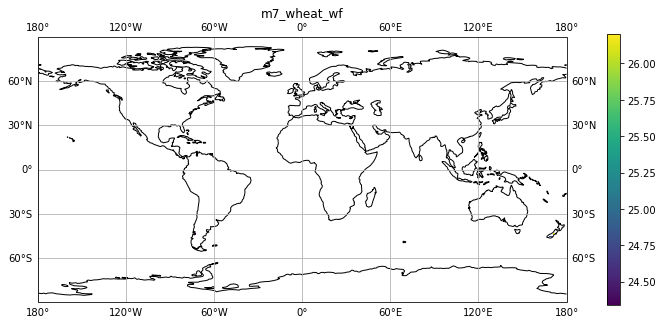

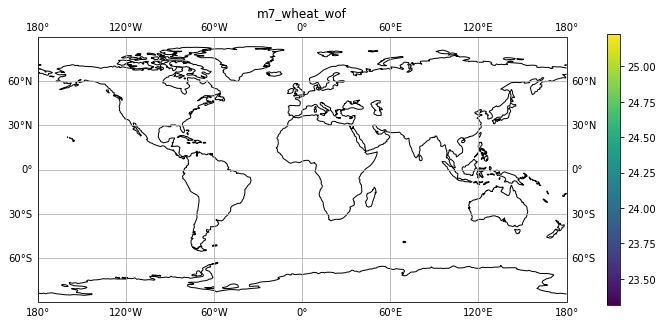

In [16]:
# quick plot of m7 values:

lons = m7_wheat_wf.coord('longitude').points
lats = m7_wheat_wf.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, m7_wheat_wf.data)
plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('m7_wheat_wf')
plt.show()

lons = m7_wheat_wof.coord('longitude').points
lats = m7_wheat_wof.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, m7_wheat_wof.data)
plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('m7_wheat_wof')
plt.show()

## Calculate M7 values for rice

In [ ]:
# Getting RICE M7 values

# This cell may take a while to run.
# Once it has run, the data is saved in the cell below
# Once the data has been saved, this cell and the cell below can be skipped, and
# the saved m7 data can be read in from the netcdf file

# a copy for storing m7 values:
m7_rice_wf_values = rice_days_new_res.copy()
m7_rice_wf_values.rename('m7_rice_wf')
m7_rice_wf_values.data = m7_rice_wf_values.data*np.nan
m7_rice_wof_values = rice_days_new_res.copy()
m7_rice_wof_values.rename('m7_rice_wof')
m7_rice_wof_values.data = m7_rice_wof_values.data*np.nan

# get grid lat and lon values:
r_lats = rice_plant_new_res.coord('latitude').points
r_lons = rice_plant_new_res.coord('longitude').points
# grid the lat and lon values:
r_lons, r_lats = np.meshgrid(r_lons, r_lats)

# start and end hours of interest:
start_hr = 9
end_hr = 15

# year which we are looking T:
data_yr = 2005

# loop throuhg planting days:
for ix, plant_day in np.ndenumerate(rice_plant_new_res.data):
     
    # skip masked cells:    
    if rice_plant_new_res.data.mask[ix] == True:
        continue        
    #skip areas where there is no rice
    if rice_dist_cube.data[ix] == 0 or rice_dist_cube.data.mask[ix] == True:
        continue
        
    # get harvest day for this cell
    harvest_day = rice_hrvst_new_res.data[ix]
    # get days as integers, dropping any decimals convert to integers:
    plant_day = int(np.floor(plant_day))
    harvest_day = int(np.floor(harvest_day))
    
    if plant_day == 0:
        plant_day = 1
    if harvest_day == 0:
        harvest_day = 1
    
    # init a list for storing all growing days:
    rice_growing_days = []
    # check if harvest date is less than plant date:
    if harvest_day < plant_day:
        # get a list from 1 -> harvest day and store:
        rice_growing_days = rice_growing_days + list(range(1, harvest_day + 1))
        # add list from plnt date to end of year:
        rice_growing_days = rice_growing_days + list(range(plant_day, 366))
    else:
        # get a list of growing days:
        rice_growing_days = list(range(plant_day, harvest_day + 1))
 
    # get lat and lon for this cell:    
    my_r_lat = r_lats[ix]
    my_r_lon = np.mod(r_lons[ix] + 180, 360) - 180
    
    # time offset, where 15 degrees = 1 hour:
    my_r_offset = np.round(my_r_lon / 15)
    my_r_timedelta = datetime.timedelta(hours = my_r_offset)
        
    # init a list for storing all o3 values for m7 calculation:
    my_rice_wf_m7 = []
    my_rice_wof_m7 = []
    
    # for each growing day:
    for growing_day in rice_growing_days:
        # for each hour in range:
        for my_hr in range(start_hr, end_hr +1):
            # get the date for this gday and hour:
            my_r_date = datetime.datetime.strptime(
                '{} {} {}'.format(data_yr, growing_day, my_hr), 
                '%Y %j %H'
            )
            # offset date to utc:
            my_r_date = my_r_date - my_r_timedelta            
            # find the index for this time: 
            my_r_wf_tindex = np.where(wf_dtimev == my_r_date)
            my_r_wof_tindex = np.where(wof_dtimev == my_r_date)
            if my_r_wf_tindex[0].size < 1 or my_r_wof_tindex[0].size == 0:
                 continue
                
            # get the ozone data for this time step, for this cell:
            my_r_wf_O3 = wf_O3v[my_r_wf_tindex, ix[0], ix[1]][0, 0]
            my_r_wof_O3 = wof_O3v[my_r_wof_tindex, ix[0], ix[1]][0, 0]
            # store values for m7 calculation:
            my_rice_wf_m7.append(my_r_wf_O3)
            my_rice_wof_m7.append(my_r_wof_O3)

    # do m7 calculation:
    my_rice_wf_m7_value = (1 / len(my_rice_wf_m7)) * np.sum(my_rice_wf_m7)
    my_rice_wof_m7_value = (1 / len(my_rice_wof_m7)) * np.sum(my_rice_wof_m7)
    # store m7 values for this cell:
    m7_rice_wf_values.data[ix] = my_rice_wf_m7_value
    m7_rice_wof_values.data[ix] = my_rice_wof_m7_value

In [ ]:
# save our m7 data:
iris.save(m7_rice_wf_values, 'm7_new_rice_wf.nc')
iris.save(m7_rice_wof_values, 'm7_new_rice_wof.nc')

In [2]:
# load the saved m7 data:
m7_rice_wf = iris.load_cube('m7_new_rice_wf.nc')
m7_rice_wof = iris.load_cube('m7_new_rice_wof.nc')

NameError: name 'iris' is not defined

In [3]:
# quick plot of m7 values:

lons = m7_rice_wf.coord('longitude').points
lats = m7_rice_wf.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, m7_rice_wf.data)
plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('m7_rice_wf')
plt.show()

lons = m7_rice_wof.coord('longitude').points
lats = m7_rice_wof.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, m7_rice_wof.data)
plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('m7_rice_wof')
plt.show()

NameError: name 'm7_rice_wf' is not defined

## Calculate relative yield loss for wheat

In [147]:
# finding ry for wheat
ry_wheat_wf = (np.exp( - ((m7_wheat_wf.data / 137) ** 2.34 ))) / (np.exp( - ((25 / 137) ** 2.34)))
ry_wheat_wof = (np.exp( - ((m7_wheat_wof.data / 137) ** 2.34 ))) / (np.exp( - ((25 / 137) ** 2.34)))

# calculating RYL for each crop with and without fires (RYL=1-RY)
ryl_wheat_wf = 1 - ry_wheat_wf
ryl_wheat_wof = 1 - ry_wheat_wof
print('mean global relative yield loss wheat with fires', ryl_wheat_wf.mean())
print('mean global relative yield loss wheat without fires', ryl_wheat_wof.mean())

# regrid relative yield to same res as CP Earth stat 5min data
ryl_wheat_wf_cube = m7_wheat_wf.copy()
ryl_wheat_wf_cube.data = ryl_wheat_wf
ryl_wheat_wof_cube = m7_wheat_wof.copy()
ryl_wheat_wof_cube.data = ryl_wheat_wof
ryl_wheat_wf_cube = ryl_wheat_wf_cube.regrid(wheat_CP_cube, iris.analysis.Nearest())
ryl_wheat_wof_cube = ryl_wheat_wof_cube.regrid(wheat_CP_cube, iris.analysis.Nearest())

# regriidded / higher res values:
ryl_wheat_wf = ryl_wheat_wf_cube.data
ryl_wheat_wof = ryl_wheat_wof_cube.data

# print relative yield loss due to fires
ryl_due_fires_wheat= ryl_wheat_wf.mean() - ryl_wheat_wof.mean()
print('total global relative yield loss due to vegetation fires', ryl_due_fires_wheat)

#defining CP for wheat
CP_wheat = wheat_CP_cube.data

#findin CPL for wheat 
#NOT SURE WHICH METHOD!!
#CPL_wheat_wf = (RYL_wheat/(1-RYL_wheat))*CP_wheat
CPL_wheat_wf = (ryl_wheat_wf/(1-ryl_wheat_wf))*CP_wheat
CPL_wheat_wof = (ryl_wheat_wof/(1-ryl_wheat_wf))*CP_wheat
print('total global crop production loss wheat with fires', CPL_wheat_wf.sum())
print('total global crop production loss wheat without fires', CPL_wheat_wof.sum())

#finding % reduction in CPL
#finding diff in CPL from removing fires- this much less CPL
CPL_wheat_diff = CPL_wheat_wf - CPL_wheat_wof

#percentage difference in crop production losses?? 
reduction_CPL_wheat_percent = (CPL_wheat_wf.sum() - CPL_wheat_wof.sum())/CPL_wheat_wf.sum()*100 
print('percentage of total losses via ozone attributed to fires is or crop production losses due to tropospheric ozone are', reduction_CPL_wheat_percent, 'less with fires removed')
reduction_CP_wheat_percent = ((CPL_wheat_diff.sum())/CP_wheat.sum())*100
print('the global percentage loss of the total produced wheat due to fires is', reduction_CP_wheat_percent)

#print total wheat crop production less due to fires ozone for globe in tonnes
print(CPL_wheat_diff.sum())

print('cp total', CP_wheat.sum())

/opt/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


mean global relative yield loss wheat with fires 0.04229638652816403
mean global relative yield loss wheat without fires 0.028685469258864536
total global relative yield loss due to vegetation fires 0.013632820583940768
total global crop production loss wheat with fires 14076101.584940208
total global crop production loss wheat without fires 12859234.754924366
percentage of total losses via ozone attributed to fires is or crop production losses due to tropospheric ozone are 8.644913669263001 less with fires removed
the global percentage loss of the total produced wheat due to fires is 0.20241143769872744
1216866.8300158384
cp total 601184816.3575832


## Calculate relative yield loss for rice

In [148]:
# finding ry for rice
ry_rice_wf = (np.exp( - ((m7_rice_wf.data / 137) ** 2.34 ))) / (np.exp( - ((25 / 137) ** 2.34)))
ry_rice_wof = (np.exp( - ((m7_rice_wof.data / 137) ** 2.34 ))) / (np.exp( - ((25 / 137) ** 2.34)))

#calculating RYL for each crop with and without fires (RYL=1-RY)
ryl_rice_wf = 1 - ry_rice_wf
ryl_rice_wof = 1 - ry_rice_wof
print('mean global relative yield loss rice with fires', ryl_rice_wf.mean())
print('mean global relative yield loss rice without fires', ryl_rice_wof.mean())

# regrid relative yield to same res as CP Earth stat 5min data
ryl_rice_wf_cube = m7_rice_wf.copy()
ryl_rice_wf_cube.data = ryl_rice_wf
ryl_rice_wof_cube = m7_rice_wof.copy()
ryl_rice_wof_cube.data = ryl_rice_wof
ryl_rice_wf_cube = ryl_rice_wf_cube.regrid(rice_CP_cube, iris.analysis.Nearest())
ryl_rice_wof_cube = ryl_rice_wof_cube.regrid(rice_CP_cube, iris.analysis.Nearest())

# regriidded / higher res values:
ryl_rice_wf = ryl_rice_wf_cube.data
ryl_rice_wof = ryl_rice_wof_cube.data

#print relative yield loss due to fires
ryl_due_fires_rice= ryl_rice_wf.mean() - ryl_rice_wof.mean()
print('total global relative yield loss due to vegetation fires', ryl_due_fires_rice)

#defining CP for rice
CP_rice = rice_CP_cube.data

#findin CPL for rice 
#NOT SURE WHICH METHOD!!
#CPL_rice_wf = (RYL_rice/(1-RYL_rice))*CP_rice
CPL_rice_wf = (ryl_rice_wf/(1-ryl_rice_wf))*CP_rice
CPL_rice_wof = (ryl_rice_wof/(1-ryl_rice_wf))*CP_rice
print('total global crop production loss rice with fires', CPL_rice_wf.sum())
print('total global crop production loss rice without fires', CPL_rice_wof.sum())

#finding % reduction in CPL
#finding diff in CPL from removing fires- this much less CPL
CPL_rice_diff = CPL_rice_wf - CPL_rice_wof

#percentage difference in crop production losses?? 
reduction_CPL_rice_percent = (CPL_rice_wf.sum() - CPL_rice_wof.sum())/CPL_rice_wf.sum()*100 
print('percentage of total losses via ozone attributed to fires is or crop production losses due to tropospheric ozone are', reduction_CPL_rice_percent, 'less with fires removed')
reduction_CP_rice_percent = ((CPL_rice_diff.sum())/CP_rice.sum())*100
print('the global percentage loss of the total produced rice due to fires is', reduction_CP_rice_percent)

#print total rice crop production less due to fires ozone for globe in tonnes
print(CPL_rice_diff.sum())

print('cp total', CP_rice.sum())

mean global relative yield loss rice with fires 0.033730897757719654
mean global relative yield loss rice without fires 0.028482050482809846
total global relative yield loss due to vegetation fires 0.005244093043091119
total global crop production loss rice with fires 31401238.888795655
total global crop production loss rice without fires 29138767.03796816
percentage of total losses via ozone attributed to fires is or crop production losses due to tropospheric ozone are 7.205040090423866 less with fires removed
the global percentage loss of the total produced rice due to fires is 0.36310032469329473
2262471.8508275077
cp total 623098272.5610567


## Get values per region

In [149]:
# load json files containing coordinates of region bounding polygons:
with open('africa.json') as json_file:
    africa_coords = json.load(json_file)
with open('asia.json') as json_file:
    asia_coords = json.load(json_file)
with open('australia_oceania.json') as json_file:
    australia_coords = json.load(json_file)
with open('europe.json') as json_file:
    europe_coords = json.load(json_file)
with open('north_america.json') as json_file:
    north_america_coords = json.load(json_file)
with open('south_america.json') as json_file:
    south_america_coords = json.load(json_file)

In [150]:
# define a function to return a cube of data for that region:
def get_region_cube(cube_in, region_coords):
    # create a copy of the input cube for storing output data:
    cube_out = cube_in.copy()
    # convert lons to -180 -> 180:
    cube_out = cube_out.intersection(longitude=(-180, 180))
    # copy the input data:
    data_src = cube_out.data.copy()
    # make sure data_src is a masked array:
    try:
        data_src = np.ma.array(data_src, mask=data_src.mask)
    except:
        data_src = np.ma.array(data_src, mask=np.zeros(data_src.shape))
    # replace existing data in output with a masked array of input data:
    cube_out.data = np.ma.array(
        cube_out.data,
        mask = np.ones(cube_out.data.shape)
    )
    # get lats and lons:
    lats = cube_out.coord('latitude').points
    lons = cube_out.coord('longitude').points
    # grid lats and lons:
    grid_lons, grid_lats = np.meshgrid(lons, lats)
    # zip the lats and lons in to coordinates:
    grid_coords = list(zip(grid_lons.flatten(), grid_lats.flatten()))
    # create polygons from provided region coordinates:
    region_polys = []
    for i in region_coords:
        region_polys.append(Path(i))
    # loop through the region polygons:
    for region_poly in region_polys:
        # get a mask of which cells are in this polygon:
        region_mask = region_poly.contains_points(grid_coords)
        # reshape to data shape:
        region_mask = region_mask.reshape(cube_out.shape)
        # unmask any values in this region in the output data:
        cube_out.data.mask[
            (region_mask == True) & (data_src.mask == False)
        ] = False
    # return the regional data cube:
    return cube_out

### Calculate regional values for wheat

In [151]:
# Extract regional CPL data

CPL_wheat_wf_cube = wheat_CP_cube.copy()
CPL_wheat_wf_cube.data = CPL_wheat_wf
CPL_wheat_wof_cube = wheat_CP_cube.copy()
CPL_wheat_wof_cube.data = CPL_wheat_wof

print('getting wf values for asia')
CPL_wheat_wf_asia = get_region_cube(CPL_wheat_wf_cube, asia_coords)
print('getting wf values for africa')
CPL_wheat_wf_africa = get_region_cube(CPL_wheat_wf_cube, africa_coords)
print('getting wf values for australia')
CPL_wheat_wf_australia = get_region_cube(CPL_wheat_wf_cube, australia_coords)
print('getting wf values for europe')
CPL_wheat_wf_europe = get_region_cube(CPL_wheat_wf_cube, europe_coords)
print('getting wf values for north america')
CPL_wheat_wf_north_america = get_region_cube(CPL_wheat_wf_cube, north_america_coords)
print('getting wf values for south america')
CPL_wheat_wf_south_america = get_region_cube(CPL_wheat_wf_cube, south_america_coords)

print('getting wof values for asia')
CPL_wheat_wof_asia = get_region_cube(CPL_wheat_wof_cube, asia_coords)
print('getting wof values for africa')
CPL_wheat_wof_africa = get_region_cube(CPL_wheat_wof_cube, africa_coords)
print('getting wof values for australia')
CPL_wheat_wof_australia = get_region_cube(CPL_wheat_wof_cube, australia_coords)
print('getting wof values for europe')
CPL_wheat_wof_europe = get_region_cube(CPL_wheat_wof_cube, europe_coords)
print('getting wof values for north america')
CPL_wheat_wof_north_america = get_region_cube(CPL_wheat_wof_cube, north_america_coords)
print('getting wof values for south america')
CPL_wheat_wof_south_america = get_region_cube(CPL_wheat_wof_cube, south_america_coords)

getting wf values for asia
getting wf values for africa
getting wf values for australia
getting wf values for europe
getting wf values for north america
getting wf values for south america
getting wof values for asia
getting wof values for africa
getting wof values for australia
getting wof values for europe
getting wof values for north america
getting wof values for south america


In [152]:
# Calculate percent reduction values for each region

reduction_CPL_wheat_percent_africa = (
    np.nansum(CPL_wheat_wf_africa.data) - np.nansum(CPL_wheat_wof_africa.data)
) / np.nansum(CPL_wheat_wf_africa.data) * 100
print('africa cpl wf', np.nansum(CPL_wheat_wf_africa.data))
print('africa cpl wof', np.nansum(CPL_wheat_wof_africa.data))
print('africa reduction:', reduction_CPL_wheat_percent_africa)

reduction_CPL_wheat_percent_asia = (
    np.nansum(CPL_wheat_wf_asia.data) - np.nansum(CPL_wheat_wof_asia.data)
) / np.nansum(CPL_wheat_wf_asia.data) * 100
print('asia cpl wf', np.nansum(CPL_wheat_wf_asia.data))
print('asia cpl wof', np.nansum(CPL_wheat_wof_asia.data))
print('asia reduction:', reduction_CPL_wheat_percent_asia)

reduction_CPL_wheat_percent_australia = (
    np.nansum(CPL_wheat_wf_australia.data) - np.nansum(CPL_wheat_wof_australia.data)
) / np.nansum(CPL_wheat_wf_australia.data) * 100
print('australia cpl wf', np.nansum(CPL_wheat_wf_australia.data))
print('australia cpl wof', np.nansum(CPL_wheat_wof_australia.data))
print('australia reduction:', reduction_CPL_wheat_percent_australia)

reduction_CPL_wheat_percent_europe = (
    np.nansum(CPL_wheat_wf_europe.data) - np.nansum(CPL_wheat_wof_europe.data)
) / np.nansum(CPL_wheat_wf_europe.data) * 100
print('europe cpl wf', np.nansum(CPL_wheat_wf_europe.data))
print('europe cpl wof', np.nansum(CPL_wheat_wof_europe.data))
print('europe reduction:', reduction_CPL_wheat_percent_europe)

reduction_CPL_wheat_percent_north_america = (
    np.nansum(CPL_wheat_wf_north_america.data) - np.nansum(CPL_wheat_wof_north_america.data)
) / np.nansum(CPL_wheat_wf_north_america.data) * 100
print('north_america cpl wf', np.nansum(CPL_wheat_wf_north_america.data))
print('north_america cpl wof', np.nansum(CPL_wheat_wof_north_america.data))
print('north_america reduction:', reduction_CPL_wheat_percent_north_america)

reduction_CPL_wheat_percent_south_america = (
    np.nansum(CPL_wheat_wf_south_america.data) - np.nansum(CPL_wheat_wof_south_america.data)
) / np.nansum(CPL_wheat_wf_south_america.data) * 100
print('south_america cpl wf', np.nansum(CPL_wheat_wf_south_america.data))
print('south_america cpl wof', np.nansum(CPL_wheat_wof_south_america.data))
print('south_america reduction:', reduction_CPL_wheat_percent_south_america)

africa cpl wf 565660.0085708103
africa cpl wof 483806.1056101974
africa reduction: 14.470512626024949
asia cpl wf 8938497.338372396
asia cpl wof 8226945.282026085
asia reduction: 7.960533291112186
australia cpl wf -4624.196740376748
australia cpl wof -30452.59004606103
australia reduction: -558.5487546444652
europe cpl wf 3685762.1000804775
europe cpl wof 3367566.234101005
europe reduction: 8.633109173609576
north_america cpl wf 2161308.053720171
north_america cpl wof 2021317.9818442236
north_america reduction: 6.477099441469639
south_america cpl wf 111435.99767032349
south_america cpl wof 42950.08941986257
south_america reduction: 61.45761664293817


In [153]:
#calculate diff in wheat CPL for each region
as_w_sum=(np.nansum(CPL_wheat_wf_asia.data))
af_w_sum=(np.nansum(CPL_wheat_wf_africa.data))
aus_w_sum=(np.nansum(CPL_wheat_wf_australia.data))
eu_w_sum=(np.nansum(CPL_wheat_wf_europe.data))
na_w_sum=(np.nansum(CPL_wheat_wf_north_america.data))
sa_w_sum=(np.nansum(CPL_wheat_wf_south_america.data))

as_wof_sum=(np.nansum(CPL_wheat_wof_asia.data))
af_wof_sum=(np.nansum(CPL_wheat_wof_africa.data))
aus_wof_sum=(np.nansum(CPL_wheat_wof_australia.data))
eu_wof_sum=(np.nansum(CPL_wheat_wof_europe.data))
na_wof_sum=(np.nansum(CPL_wheat_wof_north_america.data))
sa_wof_sum=(np.nansum(CPL_wheat_wof_south_america.data))


print(as_w_sum-as_wof_sum)
print(af_w_sum-af_wof_sum)
print(aus_w_sum-aus_wof_sum)
print(eu_w_sum-eu_wof_sum)
print(na_w_sum-na_wof_sum)
print(sa_w_sum-sa_wof_sum)

711552.0563463112
81853.9029606129
25828.39330568428
318195.86597947264
139990.07187594753
68485.90825046093


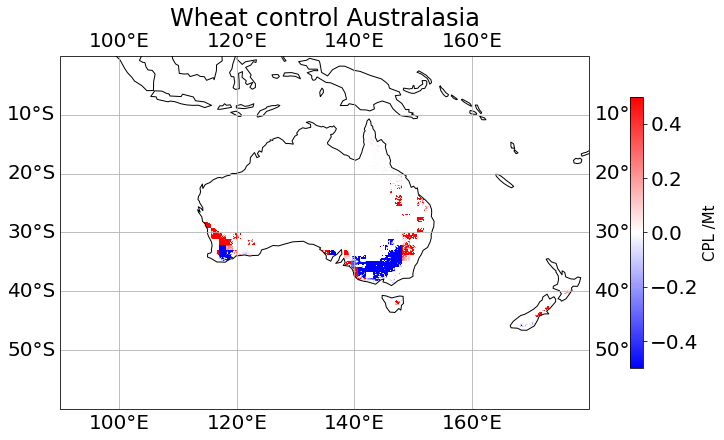

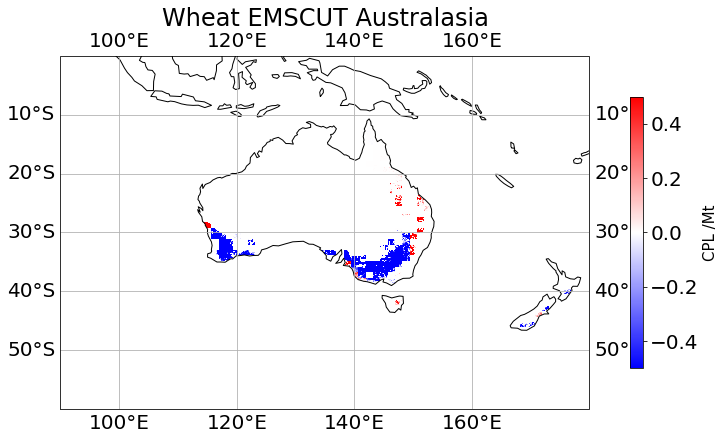

In [122]:
# Look at Australia data ...

# quick plot:

lons = CPL_wheat_wf_australia.coord('longitude').points
lats = CPL_wheat_wf_australia.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, CPL_wheat_wf_australia.data, cmap=plt.cm.bwr, vmax=0.5, vmin=-0.5)
cb = plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
cb.set_label('CPL /Mt', fontsize=15)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Wheat control Australasia')
ax.set_xlim([90, 180])
ax.set_ylim([-60, 0])
plt.show()

lons = CPL_wheat_wof_australia.coord('longitude').points
lats = CPL_wheat_wof_australia.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, CPL_wheat_wof_australia.data, cmap=plt.cm.bwr, vmax=0.5, vmin=-0.5)
cb = plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
cb.set_label('CPL /Mt', fontsize=15)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Wheat EMSCUT Australasia')
ax.set_xlim([90, 180])
ax.set_ylim([-60, 0])
plt.show()

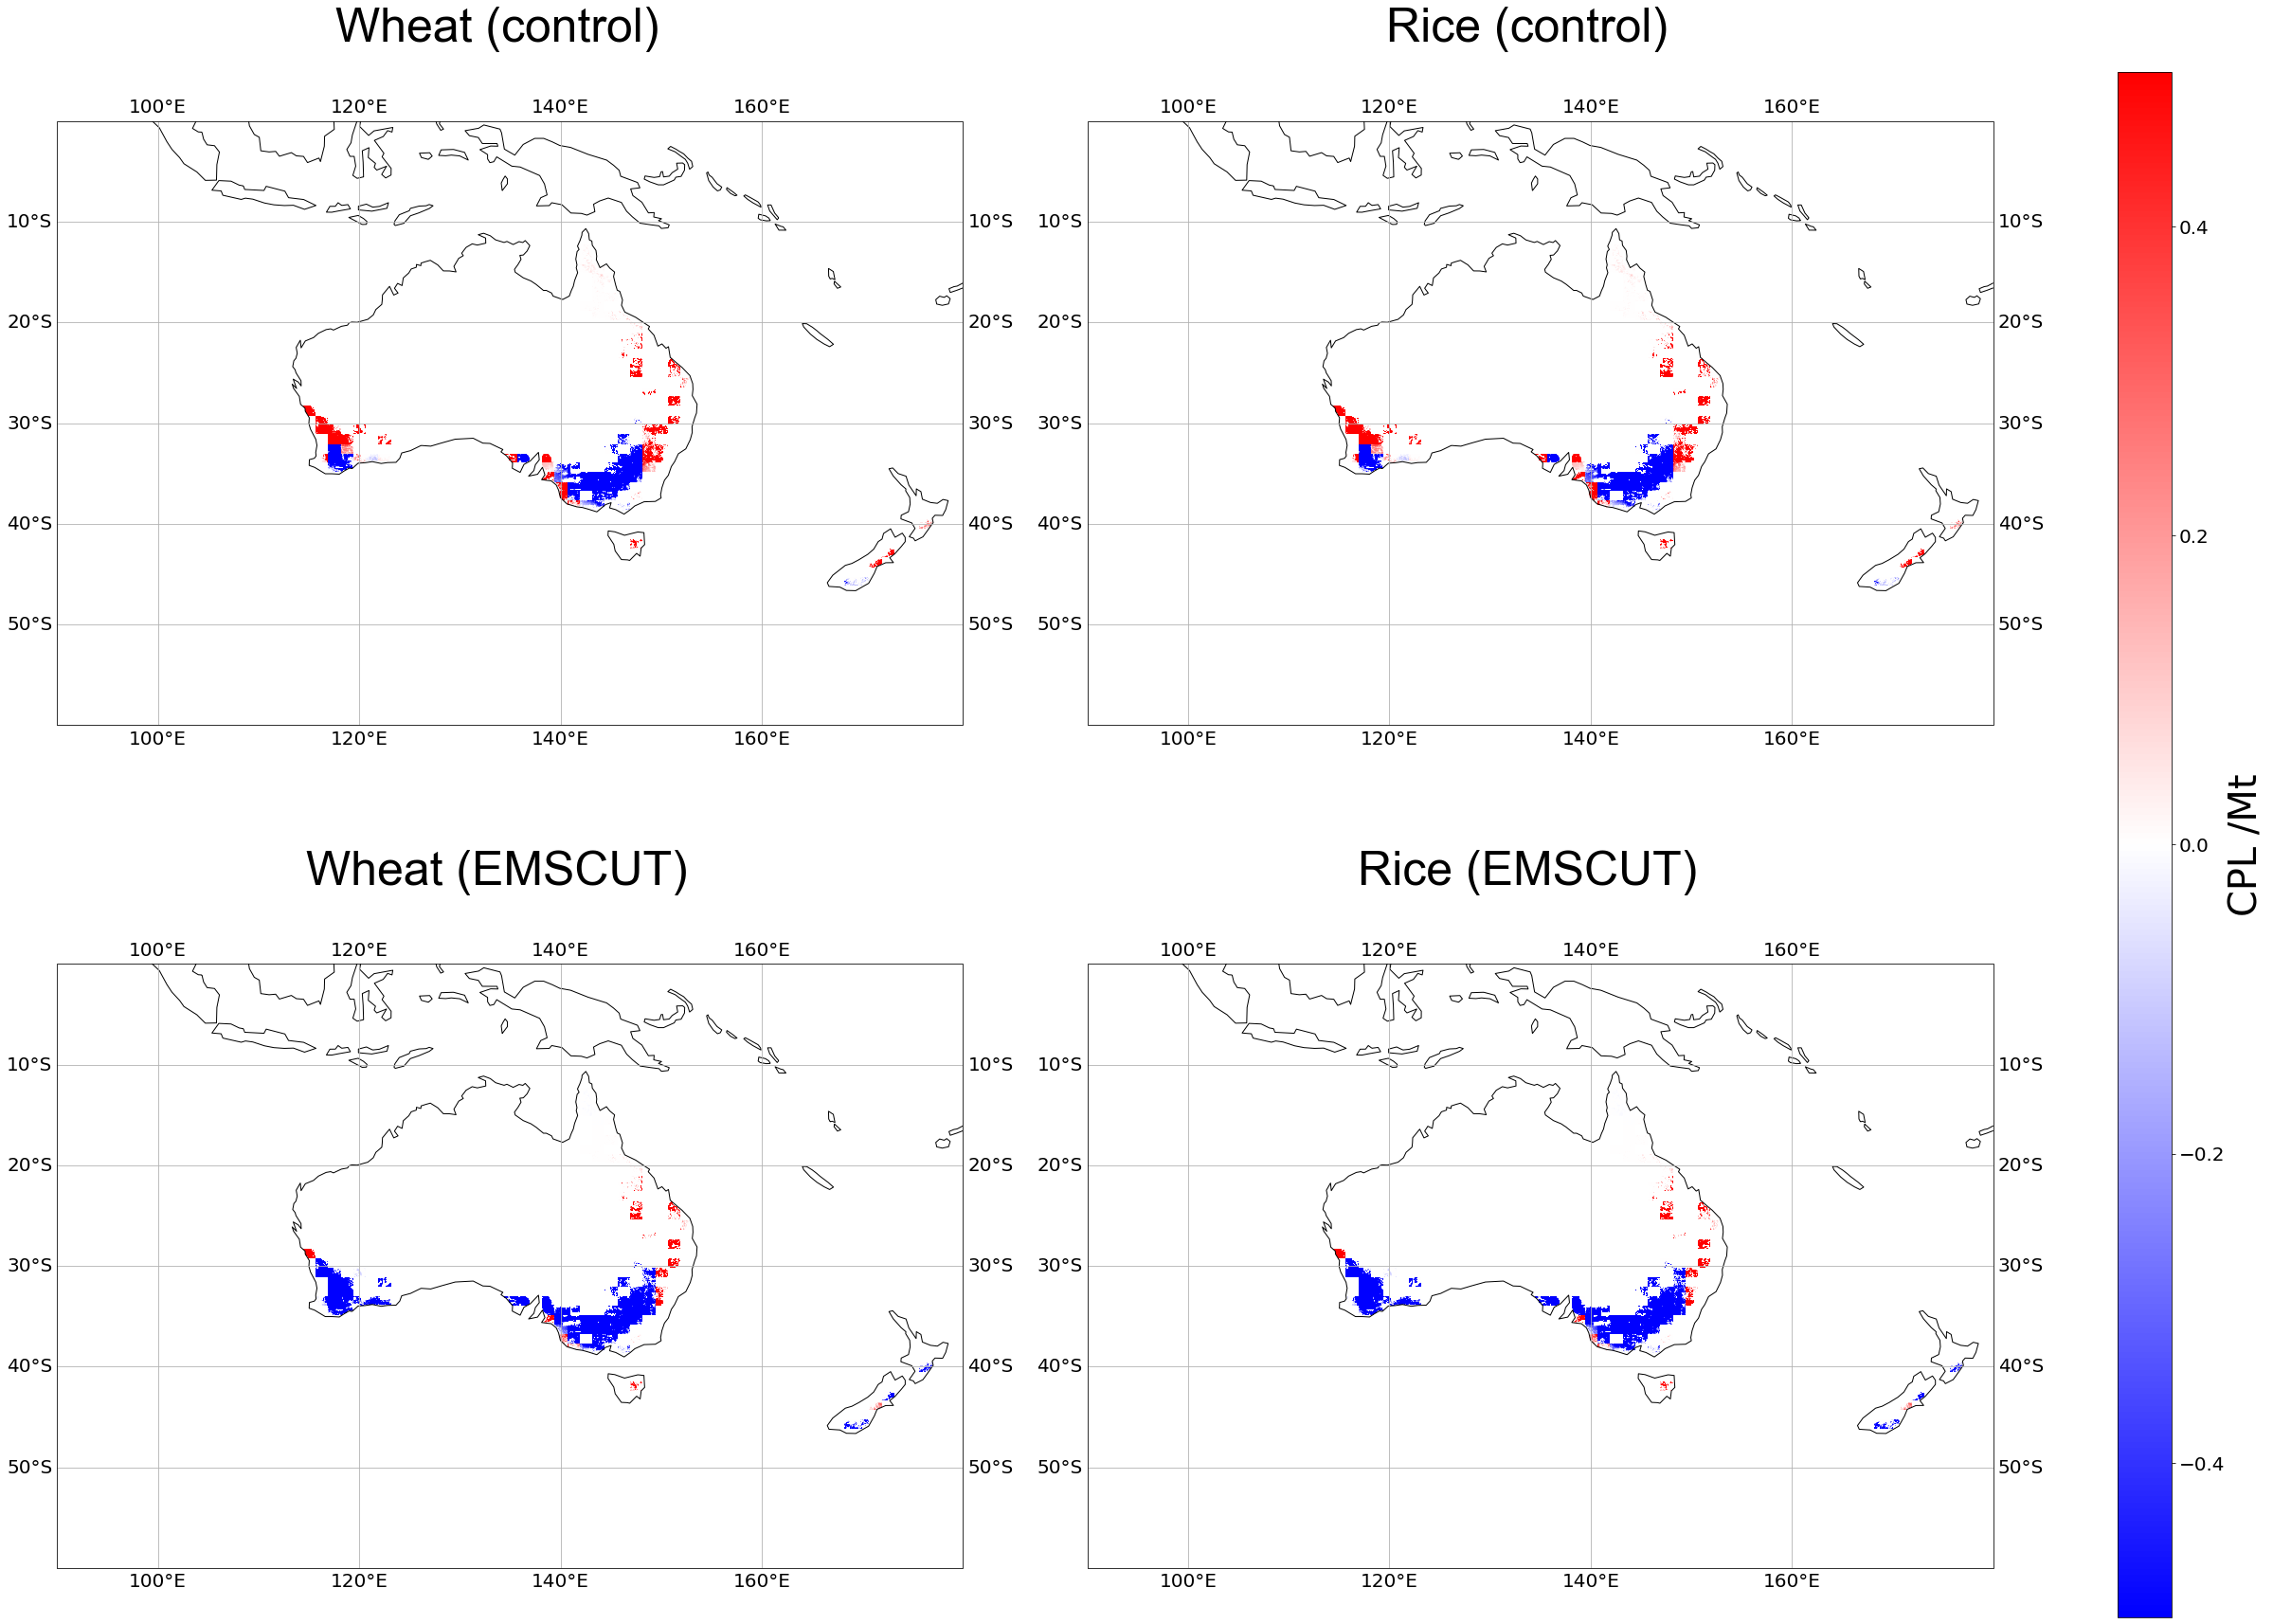

In [143]:
# Look at Australia data ...

# quick plot
grid_spec = GridSpec(2,3)
grid_spec.set_width_ratios([5,5,0.3])

fig60 = plt.figure(figsize=(40,30))

ax60 = fig60.add_subplot(grid_spec[0,0], projection=ccrs.PlateCarree())
lons = CPL_wheat_wf_australia.coord('longitude').points
lats = CPL_wheat_wf_australia.coord('latitude').points
fg60 = ax60.pcolormesh(lons, lats, CPL_wheat_wf_australia.data, cmap=plt.cm.bwr, vmax=0.5, vmin=-0.5)
ax60.coastlines()
ax60.gridlines(draw_labels=True)
ax60.set_title('Wheat (control)  \n ', **font, fontsize=50)
ax60.set_xlim([90, 180])
ax60.set_ylim([-60, 0])


ax61 = fig60.add_subplot(grid_spec[1,0], projection=ccrs.PlateCarree())
lons = CPL_wheat_wof_australia.coord('longitude').points
lats = CPL_wheat_wof_australia.coord('latitude').points
fg61 = ax61.pcolormesh(lons, lats, CPL_wheat_wof_australia.data, cmap=plt.cm.bwr, vmax=0.5, vmin=-0.5)
ax61.coastlines()
ax61.gridlines(draw_labels=True)
ax61.set_title('Wheat (EMSCUT)  \n', **font, fontsize=50)
ax61.set_xlim([90, 180])
ax61.set_ylim([-60, 0])


ax62 = fig60.add_subplot(grid_spec[0,1], projection=ccrs.PlateCarree())
lons = CPL_rice_wf_australia.coord('longitude').points
lats = CPL_rice_wf_australia.coord('latitude').points
fg62 = ax62.pcolormesh(lons, lats, CPL_wheat_wf_australia.data, cmap=plt.cm.bwr, vmax=0.5, vmin=-0.5)
ax62.coastlines()
ax62.gridlines(draw_labels=True)
ax62.set_title('Rice (control)  \n ', **font, fontsize=50)
ax62.set_xlim([90, 180])
ax62.set_ylim([-60, 0])

ax63 = fig60.add_subplot(grid_spec[1,1], projection=ccrs.PlateCarree())
lons = CPL_rice_wof_australia.coord('longitude').points
lats = CPL_rice_wof_australia.coord('latitude').points
fg63 = ax63.pcolormesh(lons, lats, CPL_wheat_wof_australia.data, cmap=plt.cm.bwr, vmax=0.5, vmin=-0.5)
ax63.coastlines()
ax63.gridlines(draw_labels=True)
ax63.set_title('Rice (EMSCUT)  \n', **font, fontsize=50)
ax63.set_xlim([90, 180])
ax63.set_ylim([-60, 0])

ax64 =fig60.add_subplot(grid_spec[:,2])
cb = plt.colorbar(fg60, ax64, shrink=0.5, pad=0.06)
cb.set_label('CPL /Mt', fontsize=40)

In [63]:
# Look at values:

print('wf min:', CPL_wheat_wf_australia.data.min())
print('wf max:', CPL_wheat_wf_australia.data.max())
print('wf mean:', CPL_wheat_wf_australia.data.mean())

print('wof min:', CPL_wheat_wof_australia.data.min())
print('wof max:', CPL_wheat_wof_australia.data.max())
print('wof mean:', CPL_wheat_wof_australia.data.mean())

wf min: -33.15545049635349
wf max: 45.50150878141922
wf mean: -0.2973951212538908
wof min: -43.99937006868285
wof max: 25.52909352218384
wof mean: -1.958491867390895


In [64]:
# Look at global values:

print('wf min:', CPL_wheat_wf.data.min())
print('wf max:', CPL_wheat_wf.data.max())
print('wf mean:', CPL_wheat_wf.data.mean())

print('wof min:', CPL_wheat_wof.data.min())
print('wof max:', CPL_wheat_wof.data.max())
print('wof mean:', CPL_wheat_wof.data.mean())

wf min: -239.99059999048748
wf max: 3090.746693880987
wf mean: 2.4388004205839953
wof min: -281.3531255585881
wof max: 2974.4515796767664
wof mean: 2.3083373124193254


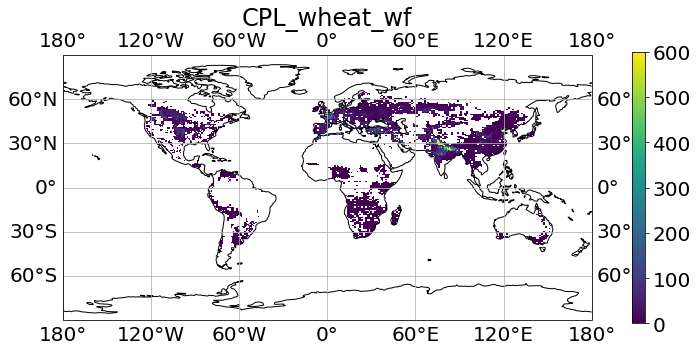

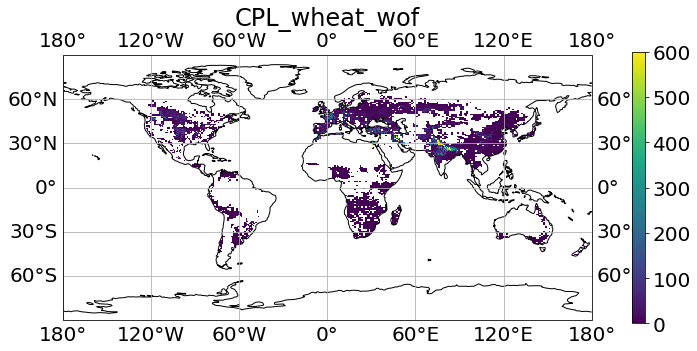

In [109]:
# quick plot:

lons = CPL_wheat_wf_australia.coord('longitude').points
lats = CPL_wheat_wf_australia.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, CPL_wheat_wf, vmax=600, vmin=0)
plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('CPL_wheat_wf')
plt.show()

lons = CPL_wheat_wof_australia.coord('longitude').points
lats = CPL_wheat_wof_australia.coord('latitude').points
ax = plt.axes(projection=ccrs.PlateCarree())
plt_cm = ax.pcolormesh(lons, lats, CPL_wheat_wof, vmax=600, vmin=0)
plt.colorbar(plt_cm, shrink=0.5, pad=0.06)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('CPL_wheat_wof')
plt.show()

### Calculate regional values for rice

In [154]:
# Extract regional CPL data

CPL_rice_wf_cube = rice_CP_cube.copy()
CPL_rice_wf_cube.data = CPL_rice_wf
CPL_rice_wof_cube = rice_CP_cube.copy()
CPL_rice_wof_cube.data = CPL_rice_wof

print('getting wf values for asia')
CPL_rice_wf_asia = get_region_cube(CPL_rice_wf_cube, asia_coords)
print('getting wf values for africa')
CPL_rice_wf_africa = get_region_cube(CPL_rice_wf_cube, africa_coords)
print('getting wf values for australia')
CPL_rice_wf_australia = get_region_cube(CPL_rice_wf_cube, australia_coords)
print('getting wf values for europe')
CPL_rice_wf_europe = get_region_cube(CPL_rice_wf_cube, europe_coords)
print('getting wf values for north america')
CPL_rice_wf_north_america = get_region_cube(CPL_rice_wf_cube, north_america_coords)
print('getting wf values for south america')
CPL_rice_wf_south_america = get_region_cube(CPL_rice_wf_cube, south_america_coords)

print('getting wof values for asia')
CPL_rice_wof_asia = get_region_cube(CPL_rice_wof_cube, asia_coords)
print('getting wof values for africa')
CPL_rice_wof_africa = get_region_cube(CPL_rice_wof_cube, africa_coords)
print('getting wof values for australia')
CPL_rice_wof_australia = get_region_cube(CPL_rice_wof_cube, australia_coords)
print('getting wof values for europe')
CPL_rice_wof_europe = get_region_cube(CPL_rice_wof_cube, europe_coords)
print('getting wof values for north america')
CPL_rice_wof_north_america = get_region_cube(CPL_rice_wof_cube, north_america_coords)
print('getting wof values for south america')
CPL_rice_wof_south_america = get_region_cube(CPL_rice_wof_cube, south_america_coords)

getting wf values for asia
getting wf values for africa
getting wf values for australia
getting wf values for europe
getting wf values for north america
getting wf values for south america
getting wof values for asia
getting wof values for africa
getting wof values for australia
getting wof values for europe
getting wof values for north america
getting wof values for south america


In [155]:
# Calculate percent reduction values for each region

reduction_CPL_rice_percent_africa = (
    np.nansum(CPL_rice_wf_africa.data) - np.nansum(CPL_rice_wof_africa.data)
) / np.nansum(CPL_rice_wf_africa.data) * 100
print('africa cpl wf', np.nansum(CPL_rice_wf_africa.data))
print('africa cpl wof', np.nansum(CPL_rice_wof_africa.data))
print('africa reduction:', reduction_CPL_rice_percent_africa)

reduction_CPL_rice_percent_asia = (
    np.nansum(CPL_rice_wf_asia.data) - np.nansum(CPL_rice_wof_asia.data)
) / np.nansum(CPL_rice_wf_asia.data) * 100
print('asia cpl wf', np.nansum(CPL_rice_wf_asia.data))
print('asia cpl wof', np.nansum(CPL_rice_wof_asia.data))
print('asia reduction:', reduction_CPL_rice_percent_asia)

reduction_CPL_rice_percent_australia = (
    np.nansum(CPL_rice_wf_australia.data) - np.nansum(CPL_rice_wof_australia.data)
) / np.nansum(CPL_rice_wf_australia.data) * 100
print('australia cpl wf', np.nansum(CPL_rice_wf_australia.data))
print('australia cpl wof', np.nansum(CPL_rice_wof_australia.data))
print('australia reduction:', reduction_CPL_rice_percent_australia)

reduction_CPL_rice_percent_europe = (
    np.nansum(CPL_rice_wf_europe.data) - np.nansum(CPL_rice_wof_europe.data)
) / np.nansum(CPL_rice_wf_europe.data) * 100
print('europe cpl wf', np.nansum(CPL_rice_wf_europe.data))
print('europe cpl wof', np.nansum(CPL_rice_wof_europe.data))
print('europe reduction:', reduction_CPL_rice_percent_europe)

reduction_CPL_rice_percent_north_america = (
    np.nansum(CPL_rice_wf_north_america.data) - np.nansum(CPL_rice_wof_north_america.data)
) / np.nansum(CPL_rice_wf_north_america.data) * 100
print('north_america cpl wf', np.nansum(CPL_rice_wf_north_america.data))
print('north_america cpl wof', np.nansum(CPL_rice_wof_north_america.data))
print('north_america reduction:', reduction_CPL_rice_percent_north_america)

reduction_CPL_rice_percent_south_america = (
    np.nansum(CPL_rice_wf_south_america.data) - np.nansum(CPL_rice_wof_south_america.data)
) / np.nansum(CPL_rice_wf_south_america.data) * 100
print('south_america cpl wf', np.nansum(CPL_rice_wf_south_america.data))
print('south_america cpl wof', np.nansum(CPL_rice_wof_south_america.data))
print('south_america reduction:', reduction_CPL_rice_percent_south_america)

africa cpl wf 381759.52601751866
africa cpl wof 273046.3303676702
africa reduction: 28.4768783071204
asia cpl wf 30094856.79067366
asia cpl wof 28040545.470666073
asia reduction: 6.826120935867727
australia cpl wf 1633.8222117042421
australia cpl wof 987.6771952670424
australia reduction: 39.548061705147525
europe cpl wf 170452.0236535625
europe cpl wof 158425.90835777228
europe reduction: 7.055425355484697
north_america cpl wf 827954.8403130264
north_america cpl wof 773170.2979231438
north_america reduction: 6.616851514409906
south_america cpl wf 111941.44256180241
south_america cpl wof 60648.09749577483
south_america reduction: 45.821586619011754


In [156]:
#rice CPL each region wf, wof and diff
as_rw_sum=(np.nansum(CPL_rice_wf_asia.data))
af_rw_sum=(np.nansum(CPL_rice_wf_africa.data))
aus_rw_sum=(np.nansum(CPL_rice_wf_australia.data))
eu_rw_sum=(np.nansum(CPL_rice_wf_europe.data))
na_rw_sum=(np.nansum(CPL_rice_wf_north_america.data))
sa_rw_sum=(np.nansum(CPL_rice_wf_south_america.data))

as_rwof_sum=(np.nansum(CPL_rice_wof_asia.data))
af_rwof_sum=(np.nansum(CPL_rice_wof_africa.data))
aus_rwof_sum=(np.nansum(CPL_rice_wof_australia.data))
eu_rwof_sum=(np.nansum(CPL_rice_wof_europe.data))
na_rwof_sum=(np.nansum(CPL_rice_wof_north_america.data))
sa_rwof_sum=(np.nansum(CPL_rice_wof_south_america.data))


print(as_rw_sum-as_rwof_sum)
print(af_rw_sum-af_rwof_sum)
print(aus_rw_sum-aus_rwof_sum)
print(eu_rw_sum-eu_rwof_sum)
print(na_rw_sum-na_rwof_sum)
print(sa_rw_sum-sa_rwof_sum)

2054311.320007585
108713.19564984844
646.1450164371997
12026.115295790223
54784.54238988261
51293.34506602758


/opt/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


AttributeError: 'AxesSubplot' object has no attribute 'gridlines'

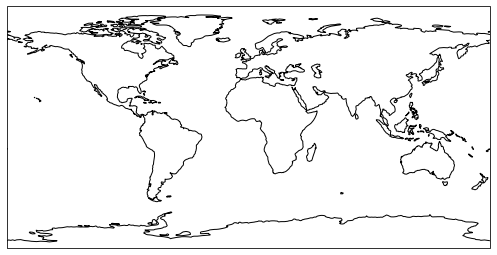

In [157]:
#making a graph of M7 values for wheat and rice in the control model scenario and the relative difference in M7 ...
    #..between the control model and 100% in global vegetation fire emissions
#wheat M7 control
m7_wf_nc = Dataset('m7_new_wheat_wf.nc')
#print('nc vars:', m7_wf_nc.variables.keys())
m7_wf = m7_wf_nc['m7_wf'][:]
m7_lon = m7_wf_nc['lon'][:]
m7_lat = m7_wf_nc['lat'][:]



#now creating global map of difference in ozone concentraion (fires on- fires off)
#finding the difference between the fires on and fires off means
m7_wof_nc = Dataset('m7_new_wheat_wof.nc')
#print('nc vars:', m7_wof_nc.variables.keys())
m7_wof = m7_wof_nc['m7_wof'][:]
#get % diff in M7 between scenarios
m7_wheat_difference = ((m7_wof[:] - m7_wf[:])/m7_wf[:])*100


#rice M7 control
m7_rice_wf_nc = Dataset('m7_new_rice_wf.nc')
#print('nc vars:', m7_rice_wf_nc.variables.keys())
m7_rice_wf = m7_rice_wf_nc['m7_rice_wf'][:]
m7_rice_lon = m7_rice_wf_nc['lon'][:]
m7_rice_lat = m7_rice_wf_nc['lat'][:]


#now creating global map of difference in ozone concentraion (fires on- fires off)
#finding the difference between the fires on and fires off means
m7_rice_wof_nc = Dataset('m7_new_rice_wof.nc')
#print('nc vars:', m7_rice_wof_nc.variables.keys())
m7_rice_wof = m7_rice_wof_nc['m7_rice_wof'][:]
m7_rice_difference = ((m7_rice_wof[:] - m7_rice_wf[:])/m7_rice_wf[:])*100



#create plot
#new layout seasonal maps 5 columns, 2 rows control with diff underneath (diff scalebar)
#make figure for seasonal ozone plots
grid_spec = GridSpec(2,3)
grid_spec.set_width_ratios([5,5,0.2])

fig23 = plt.figure(figsize=(20,10))
ax23 = fig23.add_subplot(grid_spec[0,0], projection=ccrs.PlateCarree())
#add coastlines
ax23.coastlines()
ax.gridlines(draw_labels=True)
#set size of font
plt.rc('font', size=16)
#plot data
fg23 = ax23.pcolormesh(m7_rice_lon, m7_rice_lat, m7_rice_wf, transform= ccrs.PlateCarree(), cmap=plt.cm.YlOrRd, zorder=0, vmin=0 , vmax=100)
#Add title
ax23.set_title(r'Rice M7 (control) ', **font)


ax24 = fig23.add_subplot(grid_spec[1,0], projection=ccrs.PlateCarree())
#add coastlines
ax24.coastlines()
ax.gridlines(draw_labels=True)
#set size of font
plt.rc('font', size=16)
#plot data
fg24 = ax24.pcolormesh(m7_rice_lon, m7_rice_lat, m7_rice_difference, transform= ccrs.PlateCarree(), cmap=plt.cm.bwr, zorder=0, vmin=-10 , vmax=10)
#Add title
ax24.set_title(r'Rice M7 (EMSCUT - control) ', **font)


ax25 = fig23.add_subplot(grid_spec[0,1], projection=ccrs.PlateCarree())
#add coastlines
ax25.coastlines()
ax.gridlines(draw_labels=True)
#set size of font
plt.rc('font', size=16)
#plot data
fg25 = ax25.pcolormesh(m7_lon, m7_lat, m7_wf, transform= ccrs.PlateCarree(), cmap=plt.cm.YlOrRd, zorder=0, vmin=0 , vmax=100)
#Add title
ax25.set_title(r'Wheat M7 (control) ', **font)


ax26 = fig23.add_subplot(grid_spec[1,1], projection=ccrs.PlateCarree())
#add coastlines
ax26.coastlines()
ax.gridlines(draw_labels=True)
#set size of font
plt.rc('font', size=16)
#plot data
fg26 = ax26.pcolormesh(m7_lon, m7_lat, m7_wheat_difference, transform= ccrs.PlateCarree(), cmap=plt.cm.bwr, zorder=0, vmin=-10 , vmax=10)
#Add title
ax26.set_title(r'Wheat M7 (EMSCUT - control) ', **font)


#add colorbar
ax27 =fig23.add_subplot(grid_spec[0,2])
cb= fig23.colorbar(fg25, ax27, shrink=0.7, pad=0.06)
cb.set_label('M7/ppbv', fontsize=15)

#add colorbar
ax28 =fig23.add_subplot(grid_spec[1,2])
cb= fig23.colorbar(fg26, ax28, shrink=0.7, pad=0.06)
cb.set_label(r'Relative difference in M7 /%', fontsize=15)

In [159]:
#making a figure of plots of growing season for each crop
    
#map of days in growing season
days_array= days_new_res.data
days_array[wheat_dist_cube.data == 0] =np.nan
days_array.mask[wheat_dist_cube.data.mask == True] =True

lon_WWD = days_new_res.coord('longitude').points
lat_WWD = days_new_res.coord('latitude').points


#map of days in growing season
rice_days_array= rice_days_new_res.data
rice_days_array[rice_dist_cube.data == 0] =np.nan
rice_days_array.mask[rice_dist_cube.data.mask == True] =True

lon_RD = rice_days_new_res.coord('longitude').points
lat_RD = rice_days_new_res.coord('latitude').points

#plotting data on the figure 
#initiate new figure and axis 
grid_spec = GridSpec(2,3)
grid_spec.set_width_ratios([10,10,0.7])

fig21 = plt.figure(figsize=(20,15))
ax21 = fig21.add_subplot(grid_spec[0,0], projection= ccrs.PlateCarree()
#add coastlines
ax21.coastlines()
#set size of font
plt.rc('font', size=20)
#plot data
fg21 = ax21.pcolormesh(lon_WWD, lat_WWD, days_array, transform= ccrs.PlateCarree(), cmap=plt.cm.Oranges)
#Add title
ax21.set_title('Winter wheat', **font)


#RICE

#plotting data on the figure 
ax22 = fig21.add_subplot(grid_spec[0,1], projection= ccrs.PlateCarree()
#add coastlines
ax22.coastlines()
#set size of font
plt.rc('font', size=20)
#plot data
fg22 = ax22.pcolormesh(lon_RD, lat_RD, rice_days_array, transform= ccrs.PlateCarree(), cmap=plt.cm.Oranges)
#Add title
ax22.set_title('Rice', **font)

SyntaxError: invalid syntax (<ipython-input-159-94435d6bca12>, line 28)

In [78]:
#WHEAT
#plot a map of plant dates
#do same using     m7_wof_values.data and     m7_wf_values.data
plant_array= plant_new_res.data
lon_WWD = plant_new_res.coord('longitude').points
lat_WWD = plant_new_res.coord('latitude').points
#plotting data on the figure 
#initiate new figure and axis 
fig5 = plt.figure(figsize=(20,20))
ax5 = fig5.add_subplot(3,1,1, projection= ccrs.PlateCarree(central_longitude=()))
#add coastlines
ax5.coastlines()
#set size of font
plt.rc('font', size=20)
#plot data
fg5 = ax5.pcolormesh(lon_WWD, lat_WWD, plant_array, transform= ccrs.PlateCarree(), cmap=plt.cm.Blues)
#Add title
ax5.set_title('Figure 5: Planting date of winter wheat', **font)
#add colorbar
cb= fig5.colorbar(fg5, orientation='horizontal', shrink= 0.3)
cb.set_label('Planting date /day of year', fontsize=12)
#this graph needs masking

#map of harvest date
hrvst_array= hrvst_new_res.data
lon_WWD = hrvst_new_res.coord('longitude').points
lat_WWD = hrvst_new_res.coord('latitude').points
#plotting data on the figure 
#initiate new figure and axis 
fig7 = plt.figure(figsize=(20,20))
ax7 = fig7.add_subplot(3,1,1, projection= ccrs.PlateCarree(central_longitude=()))
#add coastlines
ax7.coastlines()
#set size of font
plt.rc('font', size=20)
#plot data
fg7 = ax7.pcolormesh(lon_WWD, lat_WWD, hrvst_array, transform= ccrs.PlateCarree(), cmap=plt.cm.Blues)
#Add title
ax7.set_title('Harvest date of winter wheat', **font)
#add colorbar
cb= fig7.colorbar(fg7, orientation='horizontal', shrink= 0.3)
cb.set_label('Harvest date /day of year', fontsize=12)

TypeError: unsupported operand type(s) for -: 'float' and 'tuple'

TypeError: unsupported operand type(s) for -: 'float' and 'tuple'

<Figure size 1440x1440 with 1 Axes>

In [80]:
#RICE
#plot a map of plant dates
rice_plant_array= rice_plant_new_res.data
lon_RD = rice_plant_new_res.coord('longitude').points
lat_RD = rice_plant_new_res.coord('latitude').points
#plotting data on the figure 
#initiate new figure and axis 
fig6 = plt.figure(figsize=(20,20))
ax6 = fig6.add_subplot(3,1,1, projection= ccrs.PlateCarree(central_longitude=()))
#add coastlines
ax6.coastlines()
#set size of font
plt.rc('font', size=20)
#plot data
fg6 = ax6.pcolormesh(lon_RD, lat_RD, rice_plant_array, transform= ccrs.PlateCarree(), cmap=plt.cm.jet)
#Add title
ax6.set_title('Planting date of rice', **font)
#add colorbar
cb= fig6.colorbar(fg6, orientation='horizontal', shrink= 0.3)
cb.set_label('Planting date /day of year', fontsize=12)


#map of harvest date
rice_hrvst_array= rice_hrvst_new_res.data
lon_RD = rice_hrvst_new_res.coord('longitude').points
lat_RD = rice_hrvst_new_res.coord('latitude').points
#plotting data on the figure 
#initiate new figure and axis 
fig9 = plt.figure(figsize=(20,20))
ax9 = fig9.add_subplot(3,1,1, projection= ccrs.PlateCarree(central_longitude=()))
#add coastlines
ax9.coastlines()
#set size of font
plt.rc('font', size=20)
#plot data
fg9 = ax9.pcolormesh(lon_RD, lat_RD, rice_hrvst_array, transform= ccrs.PlateCarree(), cmap=plt.cm.Blues)
#Add title
ax9.set_title('Harvest date of rice', **font)
#add colorbar
cb= fig9.colorbar(fg9, orientation='horizontal', shrink= 0.3)
cb.set_label('Harvest date /day of year', fontsize=12)

TypeError: unsupported operand type(s) for -: 'float' and 'tuple'

TypeError: unsupported operand type(s) for -: 'float' and 'tuple'

<Figure size 1440x1440 with 1 Axes>

In [1]:
#creating a bar chart of Percentage reductions in ozone-induced crop production loss for the 2 crops considered AND EACHC REGION
#try excluding australia
nan=0
# labels for bar groups:
bar_labels = ['Africa','Europe', 'Asia', 'North America','South America']
# values for bars:
wheat_values = [-reduction_CPL_wheat_percent_africa, -reduction_CPL_wheat_percent_europe,
                -reduction_CPL_wheat_percent_asia, -reduction_CPL_wheat_percent_north_america,
               -reduction_CPL_wheat_percent_south_america]
rice_values = [-reduction_CPL_rice_percent_africa, -reduction_CPL_rice_percent_europe,
                -reduction_CPL_rice_percent_asia, -reduction_CPL_rice_percent_north_america,
               -reduction_CPL_rice_percent_south_america]
# range, same length as number of gorups:
group_range = np.arange(len(bar_labels))

# create figure:
fig, ax = plt.subplots(figsize=(10, 8))
# height for bar:
bar_height = 0.3
# create wheat bars offset by bar height:
wheat_bars = ax.barh(group_range - bar_height, wheat_values, height=bar_height, align='edge', label='Wheat', zorder=7)
# create rice bars:
rice_bars = ax.barh(group_range, rice_values, height=bar_height, align='edge', label='Rice', zorder=6)
# set y labels:
ax.set_yticks(group_range)
ax.set_yticklabels(bar_labels)
# add legend:
ax.legend()
ax.set_xlim([-70,0])
ax.set_ylabel('Continent')
ax.set_xlabel('% Change in CPL')
ax.set_title('(M7)')
#
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)



NameError: name 'reduction_CPL_wheat_percent_africa' is not defined